## Multidimensional

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from   keras.models import Sequential, Model
from   keras.layers import Dense, Input
from   keras import optimizers
from   keras.optimizers import Adam

z = np.arange(0, 1, .0001)
x = z * np.sin(z * 30)
y = z * np.cos(z * 30)

# plotting
inputs = np.stack((x, y, z), axis=1)
inputs += np.random.normal(0, size=inputs.shape) * 0.002

inputs = (inputs - np.min(inputs)) / (np.max(inputs) - np.min(inputs))

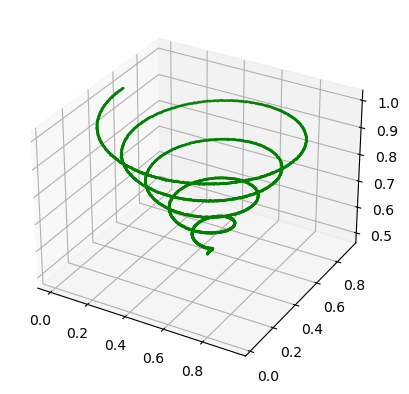

In [4]:
ax = plt.axes(projection ='3d')
ax.scatter3D(inputs[:, 0], inputs[:, 1], inputs[:, 2], color = "green", s=.5)
plt.show()

In [5]:

encoder = Sequential()
# encoder.add(Dense(1028, activation="relu"))
encoder.add(Dense(8, activation="relu"))
encoder.add(Dense(16, activation="relu"))
encoder.add(Dense(3, activation="relu"))
encoder.add(Dense(1))

decoder = Sequential()
decoder.add(Dense(3, activation="relu"))
decoder.add(Dense(8, activation="relu"))
decoder.add(Dense(16, activation="relu"))
# decoder.add(Dense(1028, activation="relu"))
decoder.add(Dense(3))

autoencoder = Sequential([encoder, decoder])
opt = Adam(learning_rate=5e-4)
autoencoder.compile(loss="mse", optimizer=opt)

In [ ]:
from keras.callbacks import Callback

class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=0.00001, verbose=0, patience=0):
        super().__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose
        self.patience = patience 
        self.patience_count = 0

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            if self.patience_count >= self.patience:
                self.model.stop_training = True
            self.patience_count += 1
        else:
            self.patience_count = 0

np.random.shuffle(inputs)

# callback = new_callback()# .EarlyStopping(monitor='loss', patience=5, min_delta=5e-10)
callback = EarlyStoppingByLossVal(monitor='val_loss', value=5e-4, verbose=1, patience=10)
history = autoencoder.fit(inputs, inputs, validation_split=.2, epochs=100000, batch_size=128, callbacks=[callback])

Epoch 1/100000
63/63 [==============================] - 2s 9ms/step - loss: 0.3108 - val_loss: 0.2250
Epoch 2/100000
63/63 [==============================] - 0s 3ms/step - loss: 0.1564 - val_loss: 0.0956
Epoch 3/100000
63/63 [==============================] - 0s 3ms/step - loss: 0.0689 - val_loss: 0.0461
Epoch 4/100000
63/63 [==============================] - 0s 3ms/step - loss: 0.0379 - val_loss: 0.0325
Epoch 5/100000
63/63 [==============================] - 0s 3ms/step - loss: 0.0320 - val_loss: 0.0310
Epoch 6/100000
63/63 [==============================] - 0s 3ms/step - loss: 0.0305 - val_loss: 0.0297
Epoch 7/100000
63/63 [==============================] - 0s 3ms/step - loss: 0.0291 - val_loss: 0.0282
Epoch 8/100000
63/63 [==============================] - 0s 3ms/step - loss: 0.0274 - val_loss: 0.0264
Epoch 9/100000
63/63 [==============================] - 0s 3ms/step - loss: 0.0252 - val_loss: 0.0237
Epoch 10/100000
63/63 [==============================] - 0s 3ms/step - loss: 0.022

In [ ]:
encoder.summary(), decoder.summary()

In [ ]:
reconstructed_point = autoencoder.predict(inputs)
ax = plt.axes(projection ='3d')
ax.scatter3D(reconstructed_point[:, 0], reconstructed_point[:, 1], reconstructed_point[:, 2], color = "green", s=.5)
plt.show()
